### Objective vs Semi-quantitative: Tau density


https://www.w3schools.com/cssref/css_colors.php


In [1]:
import sys
sys.path.insert(0,
                '/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tau_quantification/')

from helper_functions import *
from plotting import *

In [2]:
## Importing libraries 
import pandas as pd
import numpy as np 
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


**Read in data obj-semi data**

In [3]:
# Read in data 

dat = pd.read_csv('/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tau_quantification/Results/objective_semiquan_tau_PSP_May2023_corticalUpdated3_noArtefacts_novel.txt',sep='\t')

# Change region name to be more readable 
dat = dat.copy()
r = dat['region_name']
dat.loc[:,'region_name'] = [region_dict[i] for i in r]

# Subset only relevant columns 
data = dat[['Slice_ID',
            'Total_tau_density',
            'Tau_hallmark_density',
            'NFT_density',
            'CB_density',
            'TA_density',
            'Others_density',
            'Others_AF',
            'Patient_ID',
            'region_name',
            'GP_SK',
            'STN_SK',
            'STR_SK',
            'FCF_SK',
            'DE_SK',
            'OC_SK',
            'Stage_SK',
            'MDS-PSP last visit' ]]

In [4]:
dat.columns

Index(['Comments', 'Diagnosis', 'Extra_comments', 'PSP Stage', 'Patient_ID',
       'Slice_ID', 'brain_hemi', 'brain_region', 'label_name', 'new_sample_ID',
       'region_name', 'sample_ID', 'stained_protein', 'Non_tau', 'Others',
       'CB', 'NFT', 'Ambiguous', 'TA', 'Non_tau_area', 'Others_area',
       'CB_area', 'NFT_area', 'Ambiguous_area', 'TA_area', 'Area µm^2',
       'Total_tau', 'Total_tau_hallmarks', 'Total_tau_density',
       'Tau_hallmark_density', 'NFT_density', 'CB_density', 'TA_density',
       'Others_density', 'Ambiguous_density', 'Total_tau_AF',
       'Tau_hallmarks_AF', 'NFT_AF', 'CB_AF', 'TA_AF', 'Others_AF',
       'Ambiguous_AF', '_merge', 'REDCap ID', 'JR Number', 'JR', 'GP_SK',
       'STN_SK', 'STR_SK', 'FCF_SK', 'DE_SK', 'OC_SK', 'Stage_SK', 'Gender',
       'Age at Death', 'disease duration (years)', 'MDS_first',
       'MDS-PSP last visit', 'years PSPRS and death', 'years ACER and death',
       'PSPRS Total (last assesment)', 'ACE-R last assesment',
  

In [5]:
dat_subset = dat[['Patient_ID',
     'GP_SK',
     'STN_SK',
     'STR_SK',
     'FCF_SK',
     'DE_SK',
     'OC_SK',
     'Stage_SK',
     'Gender',
     'Age at Death',
     'disease duration (years)',
     'PSPRS Total (last assesment)',
     'years PSPRS and death',
     'imputed PSPRS at death_average','Extra_comments']]
dat_subset = dat_subset.drop_duplicates(subset='Patient_ID')

In [6]:
print(data.shape)
data.head()

(269, 18)


,Slice_ID,Total_tau_density,Tau_hallmark_density,NFT_density,CB_density,TA_density,Others_density,Others_AF,Patient_ID,region_name,GP_SK,STN_SK,STR_SK,FCF_SK,DE_SK,OC_SK,Stage_SK,MDS-PSP last visit
0,S760051,0.000004,9.675765e-08,0.000000e+00,8.796150e-08,8.796150e-09,0.000004,0.000070,NP19-00221,Pre-frontal,2.0,2.0,2.0,0.0,1.0,0.0,2.0,prob. PSP-RS
1,S760052,0.000010,8.333108e-07,8.389035e-08,6.543447e-07,9.507573e-08,0.000010,0.000125,NP19-00221,Temporal,2.0,2.0,2.0,0.0,1.0,0.0,2.0,prob. PSP-RS
2,S760053,0.000003,3.571501e-07,9.652706e-09,2.992339e-07,4.826353e-08,0.000003,0.000040,NP19-00221,Parietal,2.0,2.0,2.0,0.0,1.0,0.0,2.0,prob. PSP-RS
3,S760055,0.000003,9.760352e-08,1.626725e-08,6.506901e-08,1.626725e-08,0.000003,0.000031,NP19-00221,Cingulate,2.0,2.0,2.0,0.0,1.0,0.0,2.0,prob. PSP-RS
4,S760101,0.000002,1.247020e-07,0.000000e+00,1.184669e-07,6.235098e-09,0.000002,0.000031,NP19-00221,Primary somatosensory,2.0,2.0,2.0,0.0,1.0,0.0,2.0,prob. PSP-RS


In [7]:
table1, table2, table3 = data_inspection(data)
table1

No. of unique patients:  32


,Regions,Stage 2,Stage 3,Stage 4,Stage 5,Stage 6
0,Pre-motor,1,3,5,10,1
1,Subthalamic nucleus,2,2,7,9,1
2,Striatum,2,2,7,9,1
3,Dentate nucleus,2,3,9,11,2
4,Primary motor,1,3,5,9,1
5,Globus pallidus,2,2,7,9,1
6,Primary somatosensory,2,3,6,9,2
7,Cingulate,2,2,6,10,2
8,Pre-frontal,2,3,10,12,1
9,Parietal,1,3,5,10,1


In [8]:
table2

,Stage_SK,Counts
3,2.0,2
2,3.0,3
1,4.0,10
0,5.0,15
4,6.0,2


In [9]:
table3

,PSP subtype,Counts
0,prob. PSP-RS,22
1,poss. PSP-CBS,4
2,s.o. PSP-CBS,3
3,poss. PSP-PGF,1
4,poss. PSP-SL,1
5,prob. PSP-F,1


### 0) Correlation between tau types

**Correlation between tau types across all regions**

In [10]:
data_tau = data[['Total_tau_density',
                 'Tau_hallmark_density',
                 'CB_density',
                 'NFT_density',
                 'TA_density',
                 'Others_density']]
data_tau = data_tau.rename(columns={'Total_tau_density': 'Total tau',
                                    'Tau_hallmark_density': 'Tau hallmark',
                                    'NFT_density': 'NFT',
                                    'CB_density': 'CB',
                                    'TA_density':'TA',
                                    'Others_density':'TF'})
data_tau.corr()

,Total tau,Tau hallmark,CB,NFT,TA,TF
Total tau,1.000000,0.679472,0.708196,0.369101,0.012028,0.999601
Tau hallmark,0.679472,1.000000,0.988476,0.612684,0.344962,0.658483
CB,0.708196,0.988476,1.000000,0.550081,0.219742,0.688391
NFT,0.369101,0.612684,0.550081,1.000000,0.162686,0.355027
TA,0.012028,0.344962,0.219742,0.162686,1.000000,-0.000938
TF,0.999601,0.658483,0.688391,0.355027,-0.000938,1.000000


In [11]:
correlation_tau(data_tau,'TF')

,Tau_burden,TF,p_val
0,Total tau,1.000,0.000000e+00
1,Tau hallmark,0.658,8.120760e-35
2,CB,0.688,4.104243e-39
3,NFT,0.355,2.071685e-09
4,TA,-0.001,9.877847e-01
5,TF,1.000,0.000000e+00


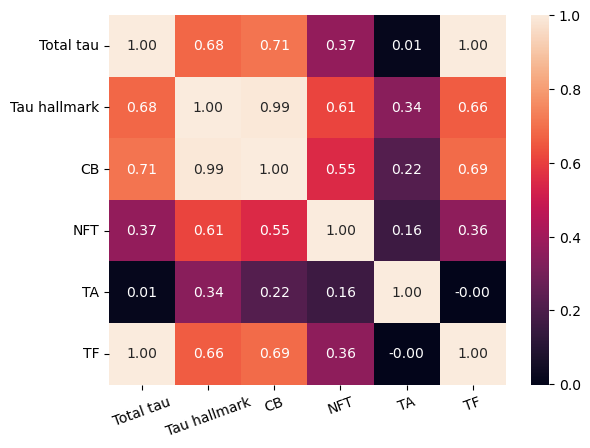

In [12]:
ax = sns.heatmap(data_tau.corr(),annot=True,fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.show()

**Correlation between tau types across cortical regions only**

In [13]:
subcortical_regions = ['Subthalamic nucleus',
                       'Globus pallidus',
                       'Striatum',
                       'Dentate nucleus'
                      ]
cortical_data = data[~(data['region_name'].isin(subcortical_regions))]
cortical_data_tau = cortical_data[['Total_tau_density',
                                   'Tau_hallmark_density',
                                   'CB_density',
                                   'NFT_density',
                                   'TA_density',
                                   'Others_density']]
cortical_data_tau = cortical_data_tau.rename(columns={'Total_tau_density': 'Total tau',
                                    'Tau_hallmark_density': 'Tau hallmark',
                                    'NFT_density': 'NFT',
                                    'CB_density': 'CB',
                                    'TA_density':'TA',
                                    'Others_density':'TF'})
cortical_data_tau.corr()

,Total tau,Tau hallmark,CB,NFT,TA,TF
Total tau,1.000000,0.945106,0.886068,0.685096,0.881906,0.997265
Tau hallmark,0.945106,1.000000,0.981281,0.726763,0.784015,0.918372
CB,0.886068,0.981281,1.000000,0.670880,0.659153,0.851109
NFT,0.685096,0.726763,0.670880,1.000000,0.538711,0.665293
TA,0.881906,0.784015,0.659153,0.538711,1.000000,0.890685
TF,0.997265,0.918372,0.851109,0.665293,0.890685,1.000000


In [14]:
correlation_tau(cortical_data_tau,'TF')

,Tau_burden,TF,p_val
0,Total tau,0.997,3.419710e-202
1,Tau hallmark,0.918,3.559390e-73
2,CB,0.851,2.055748e-51
3,NFT,0.665,3.062665e-24
4,TA,0.891,1.701638e-62
5,TF,1.000,0.000000e+00


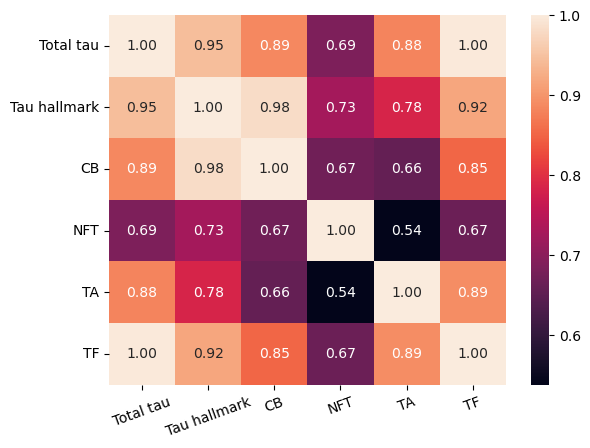

In [15]:
ax=sns.heatmap(cortical_data_tau.corr(),annot=True,fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.show()

**Correlation between tau types across subcortical regions only**

In [16]:
subcortical_data = data[(data['region_name'].isin(subcortical_regions))]
subcortical_data_tau = subcortical_data[['Total_tau_density',
                                         'Tau_hallmark_density',
                                         'CB_density',
                                         'NFT_density',
                                         'Others_density']]
subcortical_data_tau = subcortical_data_tau.rename(columns={'Total_tau_density': 'Total tau',
                                    'Tau_hallmark_density': 'Tau hallmark',
                                    'NFT_density': 'NFT',
                                    'CB_density': 'CB',
                                    'Others_density':'TF'})                                         
subcortical_data_tau.corr()

,Total tau,Tau hallmark,CB,NFT,TF
Total tau,1.000000,0.716678,0.721610,0.289901,0.999745
Tau hallmark,0.716678,1.000000,0.996571,0.504417,0.700747
CB,0.721610,0.996571,1.000000,0.436583,0.705903
NFT,0.289901,0.504417,0.436583,1.000000,0.280222
TF,0.999745,0.700747,0.705903,0.280222,1.000000


In [17]:
correlation_tau_noTA(subcortical_data_tau,'TF')

,Tau_burden,TF,p_val
0,Total tau,1.000,1.142590e-146
1,Tau hallmark,0.701,1.485470e-14
2,CB,0.706,7.844202e-15
3,NFT,0.280,7.471055e-03
4,TF,1.000,0.000000e+00


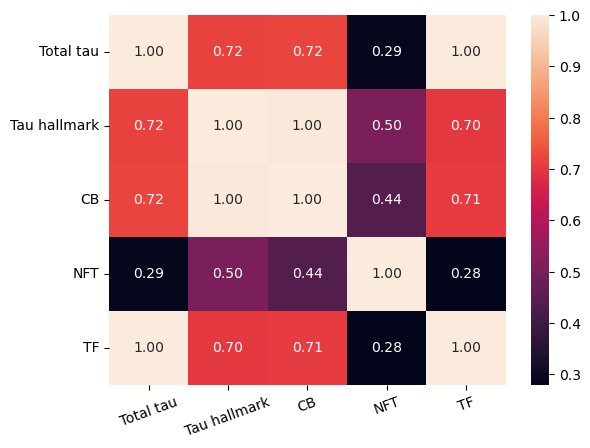

In [18]:
ax=sns.heatmap(subcortical_data_tau.corr(),annot=True,fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.show()

### 1) Tau density & Stage_SK

**Correlation betweeen tau burden & Stage_SK: all regions**

In [19]:
correlation_table(data,'Stage_SK')

,Tau_burden,Stage_SK,p_val
0,Total_tau_density,0.373,2.552307e-10
1,Tau_hallmark_density,0.473,1.953975e-16
2,CB_density,0.459,1.888980e-15
3,NFT_density,0.369,4.100313e-10
4,TA_density,0.368,4.909268e-10
5,Others_density,0.358,1.477344e-09
6,Others_AF,0.310,2.050735e-07


**Correlation betweeen tau burden & Stage_SK: cortical regions**

In [20]:
subcortical_regions = ['Subthalamic nucleus',
                       'Globus pallidus',
                       'Striatum',
                       'Dentate nucleus'
                      ]
cortical_data = data[~(data['region_name'].isin(subcortical_regions))]
correlation_table(cortical_data,'Stage_SK')

,Tau_burden,Stage_SK,p_val
0,Total_tau_density,0.568,1.048961e-16
1,Tau_hallmark_density,0.585,8.635678e-18
2,CB_density,0.577,2.861183e-17
3,NFT_density,0.511,2.854953e-13
4,TA_density,0.618,3.275235e-20
5,Others_density,0.557,5.519859e-16
6,Others_AF,0.558,4.719558e-16


Total tau correlation is stronger than only consider cortical regions as opposed to all regions. 

It is TA density that is espeically high.

**Correlation betweeen tau burden & Stage_SK: subcortical regions**

In [21]:
subcortical_data = data[(data['region_name'].isin(subcortical_regions))]
correlation_table(subcortical_data,'Stage_SK')

,Tau_burden,Stage_SK,p_val
0,Total_tau_density,0.266,0.011206
1,Tau_hallmark_density,0.391,0.000141
2,CB_density,0.378,0.000238
3,NFT_density,0.240,0.022467
4,TA_density,-0.007,0.951491
5,Others_density,0.258,0.013954
6,Others_AF,0.213,0.043394


Total tau correlation is weaked when considering only subcortical regions, likely because they are heavily affected early on in the disease course.

It is CB density that is especially high.

**Correlation betweeen tau burden & Stage_SK: regions with TA quantified**

In [22]:
data_with_TA = data[(data['region_name']!='Subthalamic nucleus')&
                    (data['region_name']!='Globus pallidus')&
                    (data['region_name']!='Dentate nucleus')]

correlation_table(data_with_TA,'Stage_SK')

,Tau_burden,Stage_SK,p_val
0,Total_tau_density,0.538,2.018235e-16
1,Tau_hallmark_density,0.577,3.551500e-19
2,CB_density,0.568,1.665117e-18
3,NFT_density,0.509,1.447017e-14
4,TA_density,0.591,3.244190e-20
5,Others_density,0.523,1.833980e-15
6,Others_AF,0.468,2.802127e-12


TA density is strongly correlated with Stage_SK in regions it can be quantified.

In [23]:
data_without_TA = data[(data['region_name']=='Subthalamic nucleus')|
                       (data['region_name']=='Globus pallidus')|
                       (data['region_name']=='Dentate nucleus')]

correlation_table(data_without_TA,'Stage_SK')

c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,Tau_burden,Stage_SK,p_val
0,Total_tau_density,0.315,0.008424
1,Tau_hallmark_density,0.432,0.000208
2,CB_density,0.426,0.000264
3,NFT_density,0.284,0.018159
4,TA_density,NaN,NaN
5,Others_density,0.306,0.010638
6,Others_AF,0.214,0.077473


In regions where TA cannot be quantified, it is CB density that correlates best with Stage_SK


Kovac's region

In [24]:
data_kovacs = data[(data['region_name']=='Subthalamic nucleus')|
                       (data['region_name']=='Globus pallidus')|
                       (data['region_name']=='Dentate nucleus')|
                       (data['region_name']=='Striatum')|
                       (data['region_name']=='Pre-frontal')|
                       (data['region_name']=='Occipital')]

correlation_table(data_kovacs,'Stage_SK')

,Tau_burden,Stage_SK,p_val
0,Total_tau_density,0.226,0.006693
1,Tau_hallmark_density,0.346,0.000024
2,CB_density,0.334,0.000045
3,NFT_density,0.231,0.005448
4,TA_density,0.191,0.022172
5,Others_density,0.217,0.009393
6,Others_AF,0.168,0.045464


In [25]:
set(data_kovacs['region_name'])

{'Dentate nucleus',
 'Globus pallidus',
 'Occipital',
 'Pre-frontal',
 'Striatum',
 'Subthalamic nucleus'}

### 2) Correlation between region-specific tau & overall PSP stage (Stage_SK)

In [26]:
correlation_region_tau_stage(data,'Stage_SK')

Correlation between region-specific tau & Stage_SK


c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array i

,Tau_burden,Globus pallidus,Globus pallidus_pval,Subthalamic nucleus,Subthalamic nucleus_pval,Striatum,Striatum_pval,Pre-frontal,Pre-frontal_pval,Dentate nucleus,Dentate nucleus_pval,Occipital,Occipital_pval
0,Total_tau_density,0.189,0.411,0.340,0.131,0.282,0.216,0.698,0.000,0.626,0.000,0.850,0.0
1,Tau_hallmark_density,0.295,0.194,0.508,0.019,0.365,0.104,0.749,0.000,0.706,0.000,0.805,0.0
2,CB_density,0.295,0.194,0.487,0.025,0.372,0.097,0.671,0.000,0.724,0.000,0.792,0.0
3,NFT_density,0.118,0.610,0.121,0.601,0.531,0.013,0.539,0.003,0.677,0.000,0.691,0.0
4,TA_density,NaN,NaN,NaN,NaN,0.333,0.141,0.725,0.000,NaN,NaN,0.827,0.0
5,Others_density,0.164,0.477,0.338,0.134,0.269,0.239,0.672,0.000,0.599,0.001,0.838,0.0
6,Others_AF,0.157,0.497,0.300,0.187,0.230,0.316,0.659,0.000,0.614,0.001,0.851,0.0


**Looking at total tau, regions with highest correlation to PSP stage:** FCF > DE > OC > STR > STN > GP

**For each region, tau density type & Stage_SK** 

1) GP: CB density

2) STN: CB density 

3) STR: NFT density

4) FCF: TA density 

5) DE: CB density

6) OC: TA density

### 3) Region-specific tau & region-specific rating

In [27]:
correlation_region_tau_region_stage(data)

c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Correlation between region-specific tau & region-specific rating


c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\mokur\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,Tau_burden,Globus pallidus,Globus pallidus_pval,Subthalamic nucleus,Subthalamic nucleus_pval,Striatum,Striatum_pval,Pre-frontal,Pre-frontal_pval,Dentate nucleus,Dentate nucleus_pval,Occipital,Occipital_pval
0,Total_tau_density,0.693,0.001,0.655,0.002,0.866,0.000,0.833,0.000,0.500,0.011,0.841,0.0
1,Tau_hallmark_density,0.616,0.005,0.436,0.062,0.828,0.000,0.728,0.000,0.578,0.002,0.804,0.0
2,CB_density,0.616,0.005,0.502,0.029,0.789,0.000,0.630,0.001,0.628,0.001,0.792,0.0
3,NFT_density,0.500,0.029,0.196,0.420,0.609,0.006,0.443,0.024,0.558,0.004,0.720,0.0
4,TA_density,NaN,NaN,NaN,NaN,0.868,0.000,0.808,0.000,NaN,NaN,0.841,0.0
5,Others_density,0.674,0.002,0.655,0.002,0.866,0.000,0.805,0.000,0.482,0.015,0.823,0.0
6,Others_AF,0.770,0.000,0.480,0.038,0.731,0.000,0.777,0.000,0.491,0.013,0.836,0.0


1) GP & GP_SK: Others density

2) STN & STN_SK: Others density

3) STR & STR_SK: TA density

4) FCF & FCF_SK: TA density

5) DE & DE_SK: CB density

6) OC & OC_SK: TA density

### Prepping for bar polar plots

In [28]:
set(data_with_TA['region_name'])

{'Cingulate',
 'Occipital',
 'Parietal',
 'Pre-frontal',
 'Pre-motor',
 'Primary motor',
 'Primary somatosensory',
 'Striatum',
 'Temporal'}

In [29]:
# Change naming system for the paper
region_code_plot = {'Cingulate':'C',
                    'Dentate nucleus': 'DN',
                    'Globus pallidus': 'GP',
                    'Occipital':'OC',
                    'Parietal':'P',
                    'Pre-frontal':'PF',
                    'Pre-motor':'PM',
                    'Primary motor': '1°M',
                    'Primary somatosensory':'1°S',
                    'Striatum':'PU',
                    'Subthalamic nucleus':'STN',
                    'Temporal':'T'}
region_code_plot_with_TA = {'Cingulate':'C',
                            'Occipital':'OC',
                            'Parietal':'P',
                            'Pre-frontal':'PF',
                            'Pre-motor':"PM",
                            'Primary motor':'1°M',
                            'Primary somatosensory':'1°S',
                            'Striatum':'PU',
                            'Temporal':'T'}

In [30]:
# for all data 
data_rename = data.copy()
data_rename.loc[:,'region_name'] = [region_code_plot[i] for i in data['region_name']]
set(data_rename['region_name'])

# for TA quantified area 
data_with_TA_rename = data_with_TA.copy()
data_with_TA_rename.loc[:,'region_name'] = [region_code_plot_with_TA[i] for i in data_with_TA['region_name']]
set(data_with_TA_rename['region_name'])

{'1°M', '1°S', 'C', 'OC', 'P', 'PF', 'PM', 'PU', 'T'}

**Check PSP-RS vs non PSP-RS**

In [31]:
data_rename.columns
x = data_rename[['Patient_ID','MDS-PSP last visit']].drop_duplicates()
x['MDS-PSP last visit'].value_counts()

prob. PSP-RS     22
poss. PSP-CBS     4
s.o. PSP-CBS      3
poss. PSP-PGF     1
poss. PSP-SL      1
prob. PSP-F       1
Name: MDS-PSP last visit, dtype: int64

This means we can group:
1) PSP-RS (22) vs non PSP-RS (10)

2) Or, do PSP-RS (22), CBS (7), others (1+1+1)

Let's try PSP-RS (22) vs non PSP-RS (10)


In [42]:
psp_rs = data_rename[data_rename['MDS-PSP last visit']=='prob. PSP-RS']
not_psp_rs = data_rename[data_rename['MDS-PSP last visit']!='prob. PSP-RS']

psp_rs_TA = data_with_TA_rename[data_with_TA_rename['MDS-PSP last visit']=='prob. PSP-RS']
not_psp_rs_TA = data_with_TA_rename[data_with_TA_rename['MDS-PSP last visit']!='prob. PSP-RS']


In [43]:
# 1) Scatter points 
# Create a dict, key = PSP stage, value = subset dataframe
psp_stage_dict_psp_rs = subset_psp_stage(psp_rs,'Stage_SK') # change here
psp_stage_dict_not_psp_rs = subset_psp_stage(not_psp_rs,'Stage_SK') # change here

psp_stage_withTA_dict_psp_rs = subset_psp_stage(psp_rs_TA,'Stage_SK') # change here 
psp_stage_withTA_dict_not_psp_rs = subset_psp_stage(not_psp_rs_TA,'Stage_SK') # change here 

# 2) mean points

mean_total_tau_dict_psp_rs = mean_tau_stage(psp_stage_dict_psp_rs,'Total_tau_density')
mean_total_tau_dict_not_psp_rs = mean_tau_stage(psp_stage_dict_not_psp_rs,'Total_tau_density')

mean_tau_hallmark_dict_psp_rs = mean_tau_stage(psp_stage_dict_psp_rs,'Tau_hallmark_density')
mean_tau_hallmark_dict_not_psp_rs = mean_tau_stage(psp_stage_dict_not_psp_rs,'Tau_hallmark_density')

mean_CB_dict_psp_rs = mean_tau_stage(psp_stage_dict_psp_rs,'CB_density')
mean_CB_dict_not_psp_rs = mean_tau_stage(psp_stage_dict_not_psp_rs,'CB_density')

mean_TA_dict_psp_rs = mean_tau_stage(psp_stage_withTA_dict_psp_rs,'TA_density')
mean_TA_dict_not_psp_rs = mean_tau_stage(psp_stage_withTA_dict_not_psp_rs,'TA_density')

mean_NFT_dict_psp_rs = mean_tau_stage(psp_stage_dict_psp_rs,'NFT_density')
mean_NFT_dict_not_psp_rs = mean_tau_stage(psp_stage_dict_not_psp_rs,'NFT_density')

# psp_stage_withTA_dict = subset_psp_stage(data_with_TA_rename,'Stage_SK') # change here 

In [34]:
# # 1) Scatter points 
# # Create a dict, key = PSP stage, value = subset dataframe
# psp_stage_dict = subset_psp_stage(data_rename,'Stage_SK') # change here 
# psp_stage_withTA_dict = subset_psp_stage(data_with_TA_rename,'Stage_SK') # change here 

# # 2) mean points 
# # Create a dict, key = PSP stage, value = mean tau hallmark density 
# mean_total_tau_dict = mean_tau_stage(psp_stage_dict,'Total_tau_density')
# mean_tau_hallmark_dict = mean_tau_stage(psp_stage_dict,'Tau_hallmark_density')
# mean_CB_dict = mean_tau_stage(psp_stage_dict,'CB_density')
# mean_TA_dict = mean_tau_stage(psp_stage_withTA_dict,'TA_density')
# mean_NFT_dict = mean_tau_stage(psp_stage_dict,'NFT_density')
# mean_Others_dict = mean_tau_stage(psp_stage_dict,'Others_density')

In [35]:
anatomical_order = ['STN',
                    'GP',
                    'PU',
                    'DN',
                    'PF',
                    'PM',
                    '1°M',
                    '1°S',
                    'T',
                    'P',
                    'OC',
                    'C']

anatomical_order_withTA = ['PU',
                           'PF',
                           'PM',
                           '1°M',
                           '1°S',
                           'T',
                           'P',
                           'OC',
                           'C']

**PSP-RS**

In [36]:
total_tau_plot = polar_plot(dict_subset=psp_stage_dict_psp_rs,
                    dict_mean=mean_total_tau_dict_psp_rs,
                    tau_type='Total_tau_density',
                    val_add=0.002,
                    anatomical_order=anatomical_order,
                    marker_colors=['PaleTurquoise','skyblue','cornflowerblue','steelblue','slategrey'],
                    marker_color='',
                    marker_line_color="black",
                   title='',
                   tick_label=True,
                   fig_height=1200,
                   fig_width=1000,
                   tickangle_val=90) # 'Total tau density across brain regions in PSP'
total_tau_plot.show()

min value:  -5.658614087379893
max value:  -2.212324961535779


**not PSP-RS**

In [37]:
total_tau_plot = polar_plot(dict_subset=psp_stage_dict_not_psp_rs,
                    dict_mean=mean_total_tau_dict_not_psp_rs,
                    tau_type='Total_tau_density',
                    val_add=0.002,
                    anatomical_order=anatomical_order,
                    marker_colors=['PaleTurquoise','skyblue','cornflowerblue','steelblue','slategrey'],
                    marker_color='',
                    marker_line_color="black",
                   title='',
                   tick_label=True,
                   fig_height=1200,
                   fig_width=1000,
                   tickangle_val=90) # 'Total tau density across brain regions in PSP'
total_tau_plot.show()

min value:  -6.691066099842773
max value:  -2.5660061837039487


**PSP-RS: Tau hallmark density**

In [39]:
tau_hallmark_plot = polar_plot(dict_subset=psp_stage_dict_psp_rs,
                    dict_mean=mean_tau_hallmark_dict_psp_rs,
                    tau_type='Tau_hallmark_density',
                    val_add=0.00005,
                    anatomical_order=anatomical_order,
                    marker_colors=['PaleTurquoise','skyblue','cornflowerblue','steelblue','slategrey'],
                    marker_color='',
                    marker_line_color="black",
                   title='',
                   tick_label=True,
                   fig_height=1200,
                   fig_width=1000,
                   tickangle_val=90) # 'Tau hallmark density across brain regions in PSP'
tau_hallmark_plot.show()

min value:  -7.0143146819689965
max value:  -3.791403386202706


**not PSP-RS: Tau hallmark density**

In [40]:
tau_hallmark_plot = polar_plot(dict_subset=psp_stage_dict_not_psp_rs,
                    dict_mean=mean_tau_hallmark_dict_not_psp_rs,
                    tau_type='Tau_hallmark_density',
                    val_add=0.00005,
                    anatomical_order=anatomical_order,
                    marker_colors=['PaleTurquoise','skyblue','cornflowerblue','steelblue','slategrey'],
                    marker_color='',
                    marker_line_color="black",
                   title='',
                   tick_label=True,
                   fig_height=1200,
                   fig_width=1000,
                   tickangle_val=90) # 'Tau hallmark density across brain regions in PSP'
tau_hallmark_plot.show()

min value:  -inf
max value:  -3.833352271253858


c:\Users\mokur\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10



In [29]:
cb_plot = polar_plot(dict_subset=psp_stage_dict,
                     dict_mean=mean_CB_dict,
                     tau_type='CB_density',
                     val_add=0.00005,
                     anatomical_order=anatomical_order,
                     marker_colors=[],
                     marker_color='BurlyWood',
                     marker_line_color='saddlebrown',
                     title='CB density across brain regions in PSP',
                     tick_label=True,
                    fig_height=1200,
                    fig_width=1000,
                    tickangle_val=90)
cb_plot.show()

min value:  -inf
max value:  -3.8382890356285024


In [30]:
ta_plot = polar_plot(dict_subset=psp_stage_withTA_dict,
                     dict_mean=mean_TA_dict,
                     tau_type='TA_density',
                     val_add=0.00001,
                     anatomical_order=anatomical_order_withTA,
                     marker_colors=[],
                     marker_color='lightcoral',
                     marker_line_color='maroon',
                     title='TA density across brain regions in PSP',
                     tick_label=True,
                    fig_height=1200,
                    fig_width=1000,
                    tickangle_val=90)
ta_plot.show()

min value:  -inf
max value:  -4.714332824778807


In [31]:
nft_plot = polar_plot(dict_subset=psp_stage_dict,
                      dict_mean=mean_NFT_dict,
                      tau_type='NFT_density',
                      val_add=0.00005,
                      anatomical_order=anatomical_order,
                      marker_colors=[],
                      marker_color='darkseagreen',
                      marker_line_color='darkslategray',
                      title='NFT density across brain regions in PSP',
                      tick_label=True,
                      fig_height=1200,
                      fig_width=1000,
                      tickangle_val=90)
nft_plot.show()

min value:  -inf
max value:  -4.267229974185


In [32]:
others_plot = polar_plot(dict_subset=psp_stage_dict,
                         dict_mean=mean_Others_dict,
                         tau_type='Others_density',
                         val_add=0.001,
                         anatomical_order=anatomical_order,
                         marker_colors=[],
                         marker_color='Plum',
                         marker_line_color='RebeccaPurple',
                        title='Others density across brain regions in PSP',
                        tick_label=True,
                        fig_height=1200,
                        fig_width=1000,
                        tickangle_val=90)
others_plot.show()

min value:  -6.691066099842773
max value:  -2.7905849745884472


In [33]:
min_val = min(np.log10(psp_stage_dict[2]['TA_density']))

In [34]:
x = psp_stage_dict[2]['TA_density']
x_array = np.array(x)
np.min(x_array[np.nonzero(x_array)])

2.8810418168042382e-09

In [35]:
together_plot = polar_plot_together(dict_subset=psp_stage_dict,
                         list_dict_mean=[mean_CB_dict,
                                         mean_NFT_dict,
                                         mean_TA_dict,
                                         mean_Others_dict],

                         list_tau_type=['CB_density',
                                        'NFT_density',
                                        'TA_density',
                                        'Others_density'],
                         min_tau_type='TA_density',
                         max_tau_type='Others_density',
                         val_add=0.002,
                         anatomical_order=anatomical_order,
                         tau_marker_colors=['forestgreen','lightcoral','gold','lightsalmon'],
                         marker_color='',
                         marker_line_color='black',
                        title='',
                        tick_label=True,
                        fig_height=2000,
                        fig_width=2000,
                        tickangle_val=90)
together_plot.show()

min value:  -8.540450438118222
max value:  -2.581760531304333


In [36]:
list(together_plot.layout.annotations)

[layout.Annotation({
     'font': {'color': 'black', 'size': 16},
     'showarrow': False,
     'text': 'Stage 2',
     'x': 0.006249999999999992,
     'xanchor': 'center',
     'xref': 'paper',
     'y': 1.0,
     'yanchor': 'bottom',
     'yref': 'paper'
 }),
 layout.Annotation({
     'font': {'color': 'black', 'size': 16},
     'showarrow': False,
     'text': 'NFT density',
     'x': 0.36875,
     'xanchor': 'center',
     'xref': 'paper',
     'y': 1.02,
     'yanchor': 'bottom',
     'yref': 'paper'
 }),
 layout.Annotation({
     'font': {'color': 'black', 'size': 16},
     'showarrow': False,
     'text': 'TA density',
     'x': 0.6312500000000001,
     'xanchor': 'center',
     'xref': 'paper',
     'y': 1.02,
     'yanchor': 'bottom',
     'yref': 'paper'
 }),
 layout.Annotation({
     'font': {'color': 'black', 'size': 16},
     'showarrow': False,
     'text': 'TF density ',
     'x': 0.89375,
     'xanchor': 'center',
     'xref': 'paper',
     'y': 1.02,
     'yanchor': 'b

In [37]:
stages = list(psp_stage_dict.keys())
stages.pop(0)
stages


[3, 4, 5, 6]